# K-means Clustering

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

There are plenty of RGB-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

### Scenario:

Assume you are provided a file with RGB triples for a bunch of colors.

The task is to use K-means clustering to:

- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked

In [1]:
# Import necessary libraries and packages
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

## Load Data

This color data was taken from a selection of digital ad images where the goal of the project was to understand if the presence of certain colors were indicative of high performing ads.

However, before making a predictive model, it was necessary to actually classify the color of RGB triples that were present in the images.

It is important to note that if the color values were uniformly distributed there would be no value in clustering.

In [2]:
data_file = "rgb_colors.csv"
df_colors = pandas.read_csv(data_file)


## Examine Data

If the thesis of the project is correct, similar colors should be near each other in the 3-dimensional RBG space.

We can plot the RBG components to verify that this is the case.

*Note: In the plot below, the full RGB triple is used to tell pandas/matplotlib what color to make each dot.*

In [3]:
# How many data points?
len(df_colors)

2030

In [4]:
# What is does the DataFrame look like?
df_colors.head()

,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


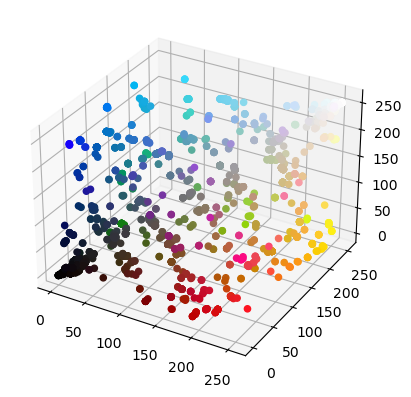

In [5]:
# Make a 3d scatter plot
colors = np.array(df_colors.values)/256 # Colors need to be (r,g,b) tuple in the range of 0-1

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(df_colors.red, df_colors.green, df_colors.blue, color=colors, alpha=1)

## Construct K-means Model

- Fit a K-means model with 10 clusters. (A fixed `random_state` is used to ensure consistent results.)
- Use the `predict` function to get the cluster predictions for each data point.
- Add these predictions to the `df_colors` DataFrame.

In [6]:
n_clusters = 10
random_state = 10

# Get np array for RGB values
X = np.array(df_colors.values)

def fit_kmeans(X, n_clusters, random_state):
    model = KMeans(n_clusters = n_clusters, random_state = random_state).fit(X)
    return model

model = fit_kmeans(X, n_clusters, random_state)

# Get cluster prediction and add to DataFrame
df_colors["cluster"] = model.predict(X)
df_colors


/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,red,green,blue,cluster
0,233,197,146,6
1,183,97,58,3
2,188,84,7,3
3,247,252,254,2
4,248,253,253,2
...,...,...,...,...
2025,27,123,141,9
2026,194,193,198,6
2027,41,113,197,9
2028,35,114,197,9


## Plot a Histogram of the Distribution of Clusters

Since there are 10 clusters, using the `pandas.DataFrame.hist()` will render the correct distribution of values across each bin since 10 is the default number of bins.

/var/folders/8p/70n8s0n94xq5btk8hg6g4n3c0000gn/T/ipykernel_1744/1188016700.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


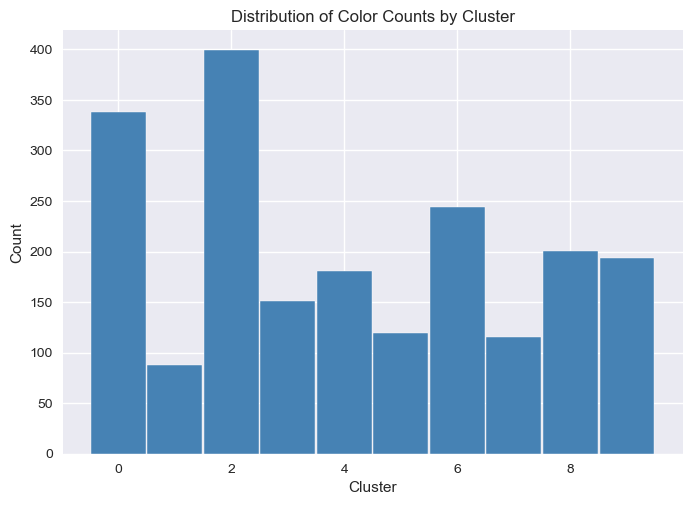

Number of points (counts) in each color cluster:

 cluster  count
       0    338
       1     88
       2    399
       3    151
       4    181
       5    119
       6    244
       7    115
       8    201
       9    194


In [7]:
# Aggregate counts of colors by cluster in dataframe
df_colors_grouped = df_colors.groupby("cluster").size().reset_index(name = "count")

# Plot histogram (frequency bar chart) of color counts by cluster
plt.style.use("seaborn")
plt.bar(
    df_colors_grouped["cluster"],
    df_colors_grouped["count"],
    edgecolor = "white",
    align = "center",
    width = 0.97,
    color = "steelblue"
)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Color Counts by Cluster")

# Display histogram (frequency bar chart)
plt.show()

# Display number of points (counts) in each color cluster
print("Number of points (counts) in each color cluster:\n")
print(df_colors_grouped.to_string(index = False))

## Examine Results of Clustering

<AxesSubplot: xlabel='index', ylabel='cluster'>

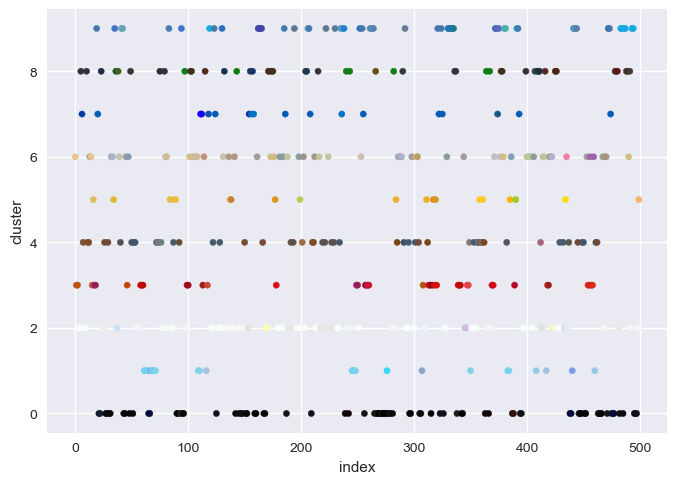

In [8]:
# Take a look at distribution of colors - only the first 500 for clarity
df_colors[:500].reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors[:500], alpha=1)

## Establish Some Human-Readable Names for the Clusters (e.g., Red, Blue, Yellow, etc.)


In [9]:
# Name clusters

color_dict = {
    0:'black', 
    1:'light blue',
    2:'white',
    3:'red',
    4:'brown',
    5:'gold',
    6:'gray',
    7:'blue',
    8:'dark green',
    9:'navy blue'
}

color_dict

{0: 'black',
 1: 'light blue',
 2: 'white',
 3: 'red',
 4: 'brown',
 5: 'gold',
 6: 'gray',
 7: 'blue',
 8: 'dark green',
 9: 'navy blue'}

## Determine the Centroids of the Clusters

In [10]:
# Display centroids for each cluster
centroids = model.cluster_centers_
print("RGB centroids of each cluster are shown below (note: each line represents a different cluster)\n")
print(centroids)

RGB centroids of each cluster are shown below (note: each line represents a different cluster)

[[ 13.74260355  12.25739645  16.14201183]
 [117.68181818 203.02272727 228.02272727]
 [244.11278195 246.61904762 246.12531328]
 [192.65562914  29.58940397  38.8013245 ]
 [105.6961326   88.13259669  85.56353591]
 [224.60504202 181.31092437  42.06722689]
 [184.58606557 176.51229508 159.07377049]
 [  5.40869565  84.85217391 195.19130435]
 [ 47.96517413  65.42288557  46.38308458]
 [ 58.28865979 131.82989691 179.89690722]]


## Write a Function that Makes the Best Guess of an RGB Triple Based on the Centroids

The  [`KMeans.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function predicts the cluster of any test data point by returning the cluster whose center is closest to the test data point.

There are many ways to calculate distance. For this exercise, we will use a simple Euclidean distance formula.

In [11]:
# Color guessing function
def guess_color(centroids, color_dict, test_color):
    color_name = color_dict.get(np.argmin(np.linalg.norm(centroids - test_color, axis = 1)))
    # statement = "The guessed color based on this RGB triple and the use of vector norm calculations is: "
    # return statement + color_name
    return color_name

# Test function
color1 = [200, 5, 5]  # Approximately 'red' 
print(guess_color(centroids=centroids, color_dict=color_dict, test_color=color1))

red


## Write a Function that Returns the Color Name Based on the `predict()` Function

In [12]:
# Color prediction function
def predict_color(model, color_dict, test_color):
    color_name = color_dict.get(model.predict([test_color])[0])
    # statement = "The predicted color based on this RGB triple and the use of the predict function is: "
    # return statement + color_name
    return color_name

# Test function
color1 = [200, 5, 5] # Approximately 'red' 
print(predict_color(model=model, color_dict=color_dict, test_color=color1))

red


## Explainability: Create a Visual Output to Show that the Guesses Worked

It is very important (when possible) to have a "visual confirmation" that code is working as expected.

Using `matplotlib` or another method (e.g., `imshow`), we can make a visual to verify that `color1` is indeed RED.

For example:

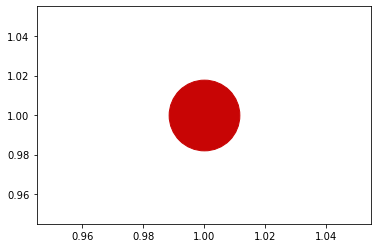




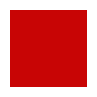

In [13]:
# Color visual function
def show_color(test_color, color_name):
    fig, ax = plt.subplots(figsize = (1, 1))
    ax.imshow([[test_color]])
    ax.axis("off")
    # print("A visual representation of the guessed color is provided below:")
    plt.show()

# Test function
color1 = [200, 5, 5] # Approximately 'red'
color1_name = guess_color(centroids=centroids, color_dict=color_dict, test_color=color1)
show_color(color1, color1_name)

## Check a Range of Colors
 
Given a list of `test_colors`, predict the colors using the `guess_color` function.

How good are the guesses? Are there any unexpected results?

In [14]:
# Generate test colors
def make_test_colors(n=3):
    test_colors = list()
    for rr in range(n+1):
        for gg in range(n+1):
            for bb in range(n+1):
                red = int(rr/n*255)
                green = int(gg/n*255)
                blue = int(bb/n*255)
                color = [red, green, blue]
                test_colors.append(color)
    test_colors = np.array(test_colors)
    return test_colors

In [15]:
# Test guesses/predictions with test colors
test_colors = make_test_colors()

g_color_list = []
p_color_list = []

for ii,cc in enumerate(test_colors):
    g_color = guess_color(centroids = centroids, color_dict = color_dict, test_color = test_colors[ii])
    g_color_list.append(g_color)
    p_color = predict_color(model = model, color_dict = color_dict, test_color = test_colors[ii])
    p_color_list.append(p_color)

print("Guessed Colors")
print(".......................................................................................................")
    
g_row = 0
for g_element in g_color_list:
    print(g_row, g_element)
    g_row += 1

print("=======================================================================================================")
 
print("Predicted Colors")
print(".......................................................................................................")
    
p_row = 0
for p_element in p_color_list:
    print(p_row, p_element)
    p_row += 1
    
print("=======================================================================================================")

count = 0
for i in range(len(g_color_list)):
    if g_color_list[i] == p_color_list[i]:
        count += 1

match_percentage = round(count / len(g_color_list), 10)

print("Percentage of the time our guessed and predicted color matched: " + "{:.2%}".format(match_percentage))

Guessed Colors
.......................................................................................................
0 black
1 black
2 blue
3 blue
4 dark green
5 dark green
6 blue
7 blue
8 dark green
9 navy blue
10 navy blue
11 navy blue
12 dark green
13 navy blue
14 navy blue
15 light blue
16 black
17 dark green
18 blue
19 blue
20 dark green
21 brown
22 navy blue
23 navy blue
24 brown
25 brown
26 navy blue
27 light blue
28 gold
29 gray
30 light blue
31 light blue
32 red
33 red
34 red
35 navy blue
36 red
37 brown
38 gray
39 light blue
40 gold
41 gold
42 gray
43 light blue
44 gold
45 gold
46 gray
47 white
48 red
49 red
50 red
51 gray
52 red
53 red
54 gray
55 gray
56 gold
57 gold
58 gray
59 white
60 gold
61 gold
62 white
63 white
Predicted Colors
.......................................................................................................
0 black
1 black
2 blue
3 blue
4 dark green
5 dark green
6 blue
7 blue
8 dark green
9 navy blue
10 navy blue
11 navy blue
12 dark green
13 n

### Comments on Quality of Color Guesses –– Part 1:
Based on the results above, we have a 100% match rate between the guessed colors and predicted colors for each element in the color list. This means that the guess_color function is completely consistent with the predict_color function across this sample of test colors. That may *initially* seem like a good indicator that the quality of our guesses is high, but an even better indicator would be to compare the guessed colors to the actual colors generated by the show_color function –– or a portion of the same logic from this function –– by evaluating each RGB tiple in the test_colors array and representing it in a visualization/chart. I've added one additional code block below to perform this additional quality check and further evaluates the quality of the color guesses.

0


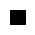

1


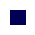

2


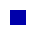

3


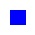

4


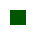

5


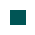

6


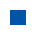

7


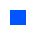

8


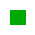

9


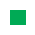

10


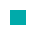

11


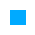

12


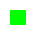

13


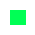

14


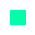

15


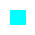

16


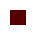

17


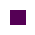

18


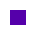

19


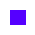

20


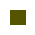

21


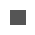

22


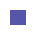

23


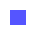

24


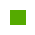

25


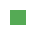

26


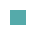

27


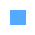

28


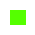

29


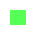

30


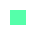

31


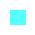

32


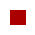

33


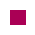

34


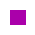

35


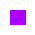

36


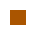

37


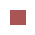

38


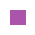

39


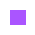

40


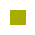

41


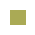

42


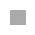

43


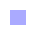

44


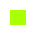

45


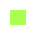

46


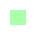

47


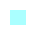

48


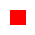

49


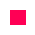

50


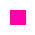

51


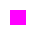

52


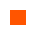

53


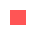

54


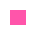

55


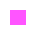

56


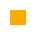

57


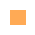

58


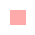

59


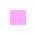

60


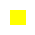

61


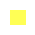

62


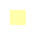

63


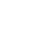

In [16]:
# Check the colors produced by the same logic in our `show_color` function to manually compare against guesses

s_row = 0

for ii, cc in enumerate(test_colors):
    fig, ax = plt.subplots(figsize = (0.2, 0.2))
    ax.imshow([[test_colors[ii]]])
    ax.axis("off")
    print(s_row)
    plt.show()
    s_row += 1

### Comments on Quality of Color Guesses –– Part 2:
Based on the results above, we now see some more interesting (and perhaps unexpected) outcomes. After manually checking each guessed color against the each color produced by plotting each RGB triple in a simple visualization (patterned after the show_color function), I found that only a little over a third (~ 36%) of the color guesses were safely correct, with another quarter or so (~ 23%) being "borderline" cases (i.e., depending on the observer's perceptions of colors, they could be considered correct or incorrect). Meanwhile, a little under half (~ 41%) of the color guesses were safely *incorrect*. For example, RGB triple element #13 in the test_colors array (which has the triple code of [0, 255, 0]) clearly maps to a green color but is guessed as "navy blue" by the guess_color function. This means that, at best, we're seeing only ~ 59% of the color guesses actually turn out to be correct –– a finding which suggests that the quality of the guesses produced by the guess_color function is only mediocre and could benefit from further refining/improvement. Based on the manual review/comparison of color visuals to guessed colors, it looks like the guess_color function struggles to correctly label colors that aren't in the color_dict –– for example, we have no color_dict entry for the color purple, or yellow, or "normal" green, but have several entries for variations of blue –– or that appear to be variations on the colors within the color_dict where shadings differ to a meaningful degree (e.g., lighter/darker than some of the entries in the color_dict). I suspect we could improve the quality of the color guesses by adding more granularity (i.e., more entries) to the color_dict and increasing the number of clusters in our model from 10 to 20, 30, 50+, etc. However, the trade-off of making these types of changes would be a more "verbose" or complicated model that'd require more time to build –– and cost more computing power for larger datasets –– and that'd actually reduce the need for clustering in the first place and perhaps lend itself better to classification (i.e., if we had labeled data and were trying to increase our model's color guess accuracy against those labels, we might as well build a multiclass logistic regression model and go with a supervised learning approach rather than an unsupervised learning approach like clustering). For now, this 10-cluster color model appears to be a decent start, and if it were used to cluster RGB triples in a larger dataset or for further analysis of ad performance, I'd present it with the important caveat that it struggles to correctly label certain cases/colors, yet still does okay with clustering those cases/colors with relatively similar (or "similar enough," depending on the task at hand) colors.

EVALUATION LABEL* | % OF CASES
:--|:--
Correct | ~36%
Borderline | ~23%
Incorrect | ~41%

*Note: Evaluation labels are based on a manual comparison of guessed colors (color words) to visualized colors (generated in a figure by each RGB triple)